In [19]:
import pandas as pd
df = pd.read_csv('data/data.csv')

In [20]:
df.shape

(569, 33)

In [21]:
df.columns # column names.

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [22]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from time import time
from pprint import pprint

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, cohen_kappa_score, precision_recall_fscore_support

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100) 

df = pd.read_csv('data/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [23]:
df.shape

(569, 33)

In [24]:
df.select_dtypes(include=np.number)# select numerical columns.
df.select_dtypes(include=np.number).columns
df.select_dtypes(include=np.number).columns.to_list()


['id',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

In [25]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [26]:
class_mapping = {'M': 'malignant', 'B': 'benign'}
class_mapping
df['diagnosis'] = df['diagnosis'].map(class_mapping)
df['diagnosis']
df = df.drop('Unnamed: 32', axis=1)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
df.shape

(569, 32)

In [30]:
['{}: {}'.format(i, name) for (i, name) in enumerate(list(df.columns[2:]))]

['0: radius_mean',
 '1: texture_mean',
 '2: perimeter_mean',
 '3: area_mean',
 '4: smoothness_mean',
 '5: compactness_mean',
 '6: concavity_mean',
 '7: concave points_mean',
 '8: symmetry_mean',
 '9: fractal_dimension_mean',
 '10: radius_se',
 '11: texture_se',
 '12: perimeter_se',
 '13: area_se',
 '14: smoothness_se',
 '15: compactness_se',
 '16: concavity_se',
 '17: concave points_se',
 '18: symmetry_se',
 '19: fractal_dimension_se',
 '20: radius_worst',
 '21: texture_worst',
 '22: perimeter_worst',
 '23: area_worst',
 '24: smoothness_worst',
 '25: compactness_worst',
 '26: concavity_worst',
 '27: concave points_worst',
 '28: symmetry_worst',
 '29: fractal_dimension_worst']

In [39]:
X = df.iloc[:, 2:].values
X
y = np.where(df['diagnosis'] == 'malignant', 1, 0) # Labelling.
y

print('Class labels:', np.unique(y), np.unique(df['diagnosis']),
      [(i, val) for (i, val) in enumerate(np.bincount(y))])

Class labels: [0 1] ['benign' 'malignant'] [(0, 357), (1, 212)]


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [41]:
print('Labels counts in y:', np.bincount(y),
      [round(cnt / np.sum(np.bincount(y)) * 100, 1) for cnt in np.bincount(y)])

print('Labels counts in y_train:', np.bincount(y_train),
      [round(cnt / np.sum(np.bincount(y_train)) * 100, 1) for cnt in np.bincount(y_train)])

print('Lables counts in y_test:', np.bincount(y_test),
      [round(cnt / np.sum(np.bincount(y_test)) * 100, 1) for cnt in np.bincount(y_test)])

Labels counts in y: [357 212] [62.7, 37.3]
Labels counts in y_train: [250 148] [62.8, 37.2]
Lables counts in y_test: [107  64] [62.6, 37.4]


In [48]:
data = pd.DataFrame(np.hstack((y_train.reshape(-1,1), X_train)),
                    columns=['target'] + list(df.iloc[:, 2:].columns))
data
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
target,398.0,0.37,0.48,0.00,0.00,0.00,1.00,1.00
radius_mean,398.0,14.13,3.55,6.98,11.67,13.36,15.83,28.11
texture_mean,398.0,19.44,4.32,9.71,16.33,19.03,21.86,39.28
perimeter_mean,398.0,91.90,24.45,43.79,75.01,86.36,104.18,188.50
area_mean,398.0,655.33,353.68,143.50,416.45,548.75,790.58,2499.00
smoothness_mean,398.0,0.10,0.01,0.06,0.09,0.10,0.10,0.16
compactness_mean,398.0,0.10,0.05,0.02,0.06,0.09,0.13,0.35
concavity_mean,398.0,0.09,0.08,0.00,0.03,0.06,0.13,0.43
concave points_mean,398.0,0.05,0.04,0.00,0.02,0.03,0.07,0.20
symmetry_mean,398.0,0.18,0.03,0.11,0.16,0.18,0.20,0.29


<Axes: xlabel='target'>

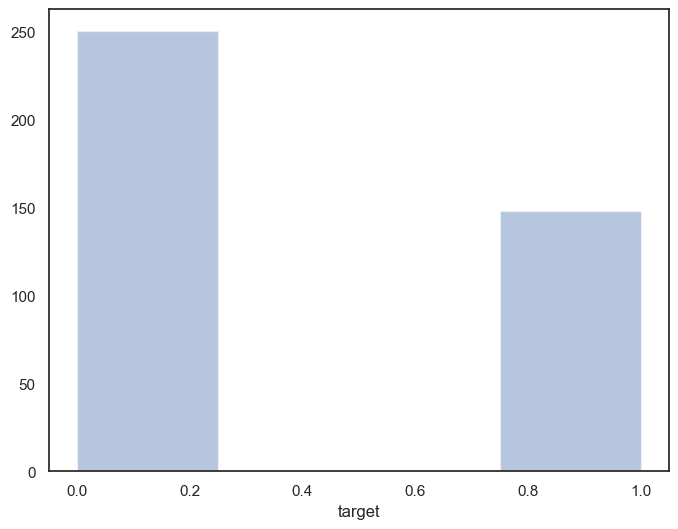

In [49]:
plt.subplots(figsize=(8, 6))
sns.distplot(data.target, kde=False)

In [53]:
X_train


array([[2.018e+01, 2.397e+01, 1.437e+02, ..., 2.508e-01, 5.440e-01,
        9.964e-02],
       [1.603e+01, 1.551e+01, 1.058e+02, ..., 1.981e-01, 3.019e-01,
        9.124e-02],
       [1.366e+01, 1.515e+01, 8.827e+01, ..., 1.054e-01, 3.387e-01,
        9.638e-02],
       ...,
       [1.300e+01, 2.513e+01, 8.261e+01, ..., 5.921e-02, 2.306e-01,
        6.291e-02],
       [1.420e+01, 2.053e+01, 9.241e+01, ..., 1.339e-01, 2.534e-01,
        7.858e-02],
       [1.979e+01, 2.512e+01, 1.304e+02, ..., 1.732e-01, 3.305e-01,
        8.465e-02]])

In [55]:
X_train.T

array([[2.018e+01, 1.603e+01, 1.366e+01, ..., 1.300e+01, 1.420e+01,
        1.979e+01],
       [2.397e+01, 1.551e+01, 1.515e+01, ..., 2.513e+01, 2.053e+01,
        2.512e+01],
       [1.437e+02, 1.058e+02, 8.827e+01, ..., 8.261e+01, 9.241e+01,
        1.304e+02],
       ...,
       [2.508e-01, 1.981e-01, 1.054e-01, ..., 5.921e-02, 1.339e-01,
        1.732e-01],
       [5.440e-01, 3.019e-01, 3.387e-01, ..., 2.306e-01, 2.534e-01,
        3.305e-01],
       [9.964e-02, 9.124e-02, 9.638e-02, ..., 6.291e-02, 7.858e-02,
        8.465e-02]])

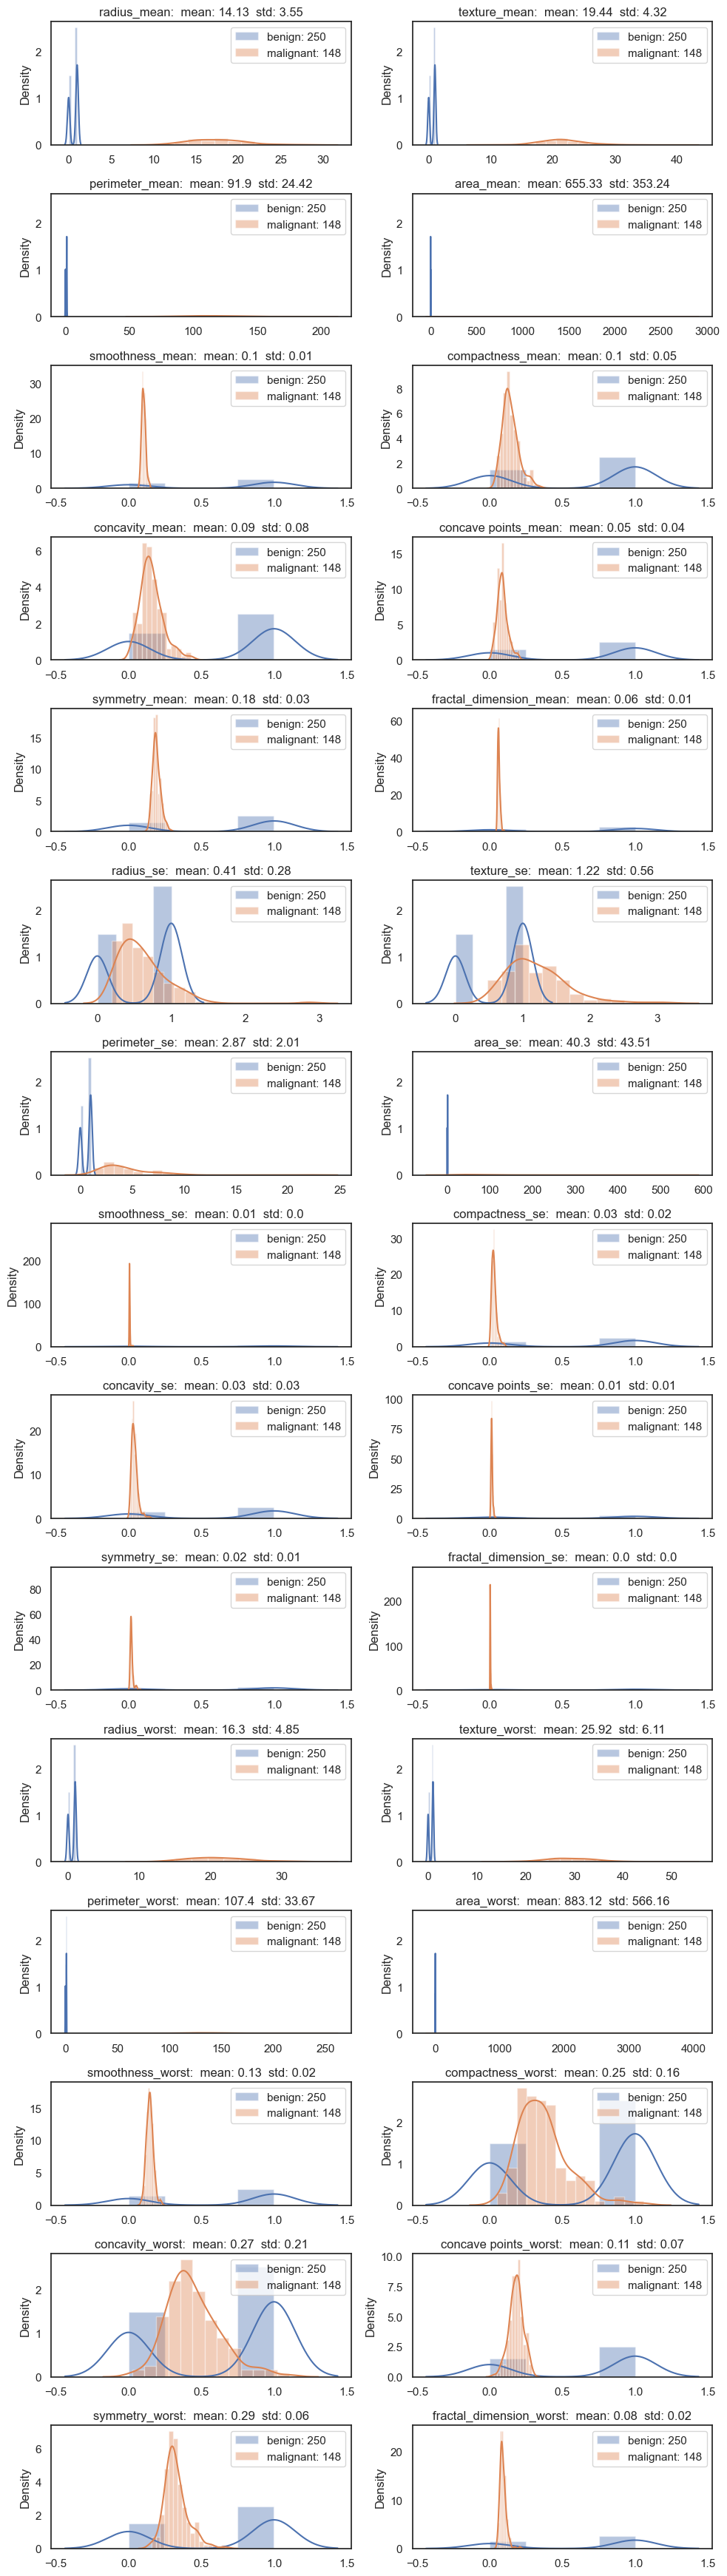

In [ ]:

f, axs = plt.subplots(15, 2, figsize=(10,35))

for i, feat in enumerate(X_train.T):
    sns.distplot(feat[y_train==0], ax=axs.flat[i], label='{}: {}'.format(np.unique(df['diagnosis'])[0], len(y_train[y_train==0])))
    sns.distplot(feat[y_train==1], ax=axs.flat[i], label='{}: {}'.format(np.unique(df['diagnosis'])[1], len(y_train[y_train==1])))
    axs.flat[i].set_title('{}:  mean: {}  std: {}'.format(list(df.iloc[:, 2:].columns)[i], abs(feat.mean().round(2)), feat.std().round(2)))
    axs.flat[i].legend()
plt.tight_layout()  

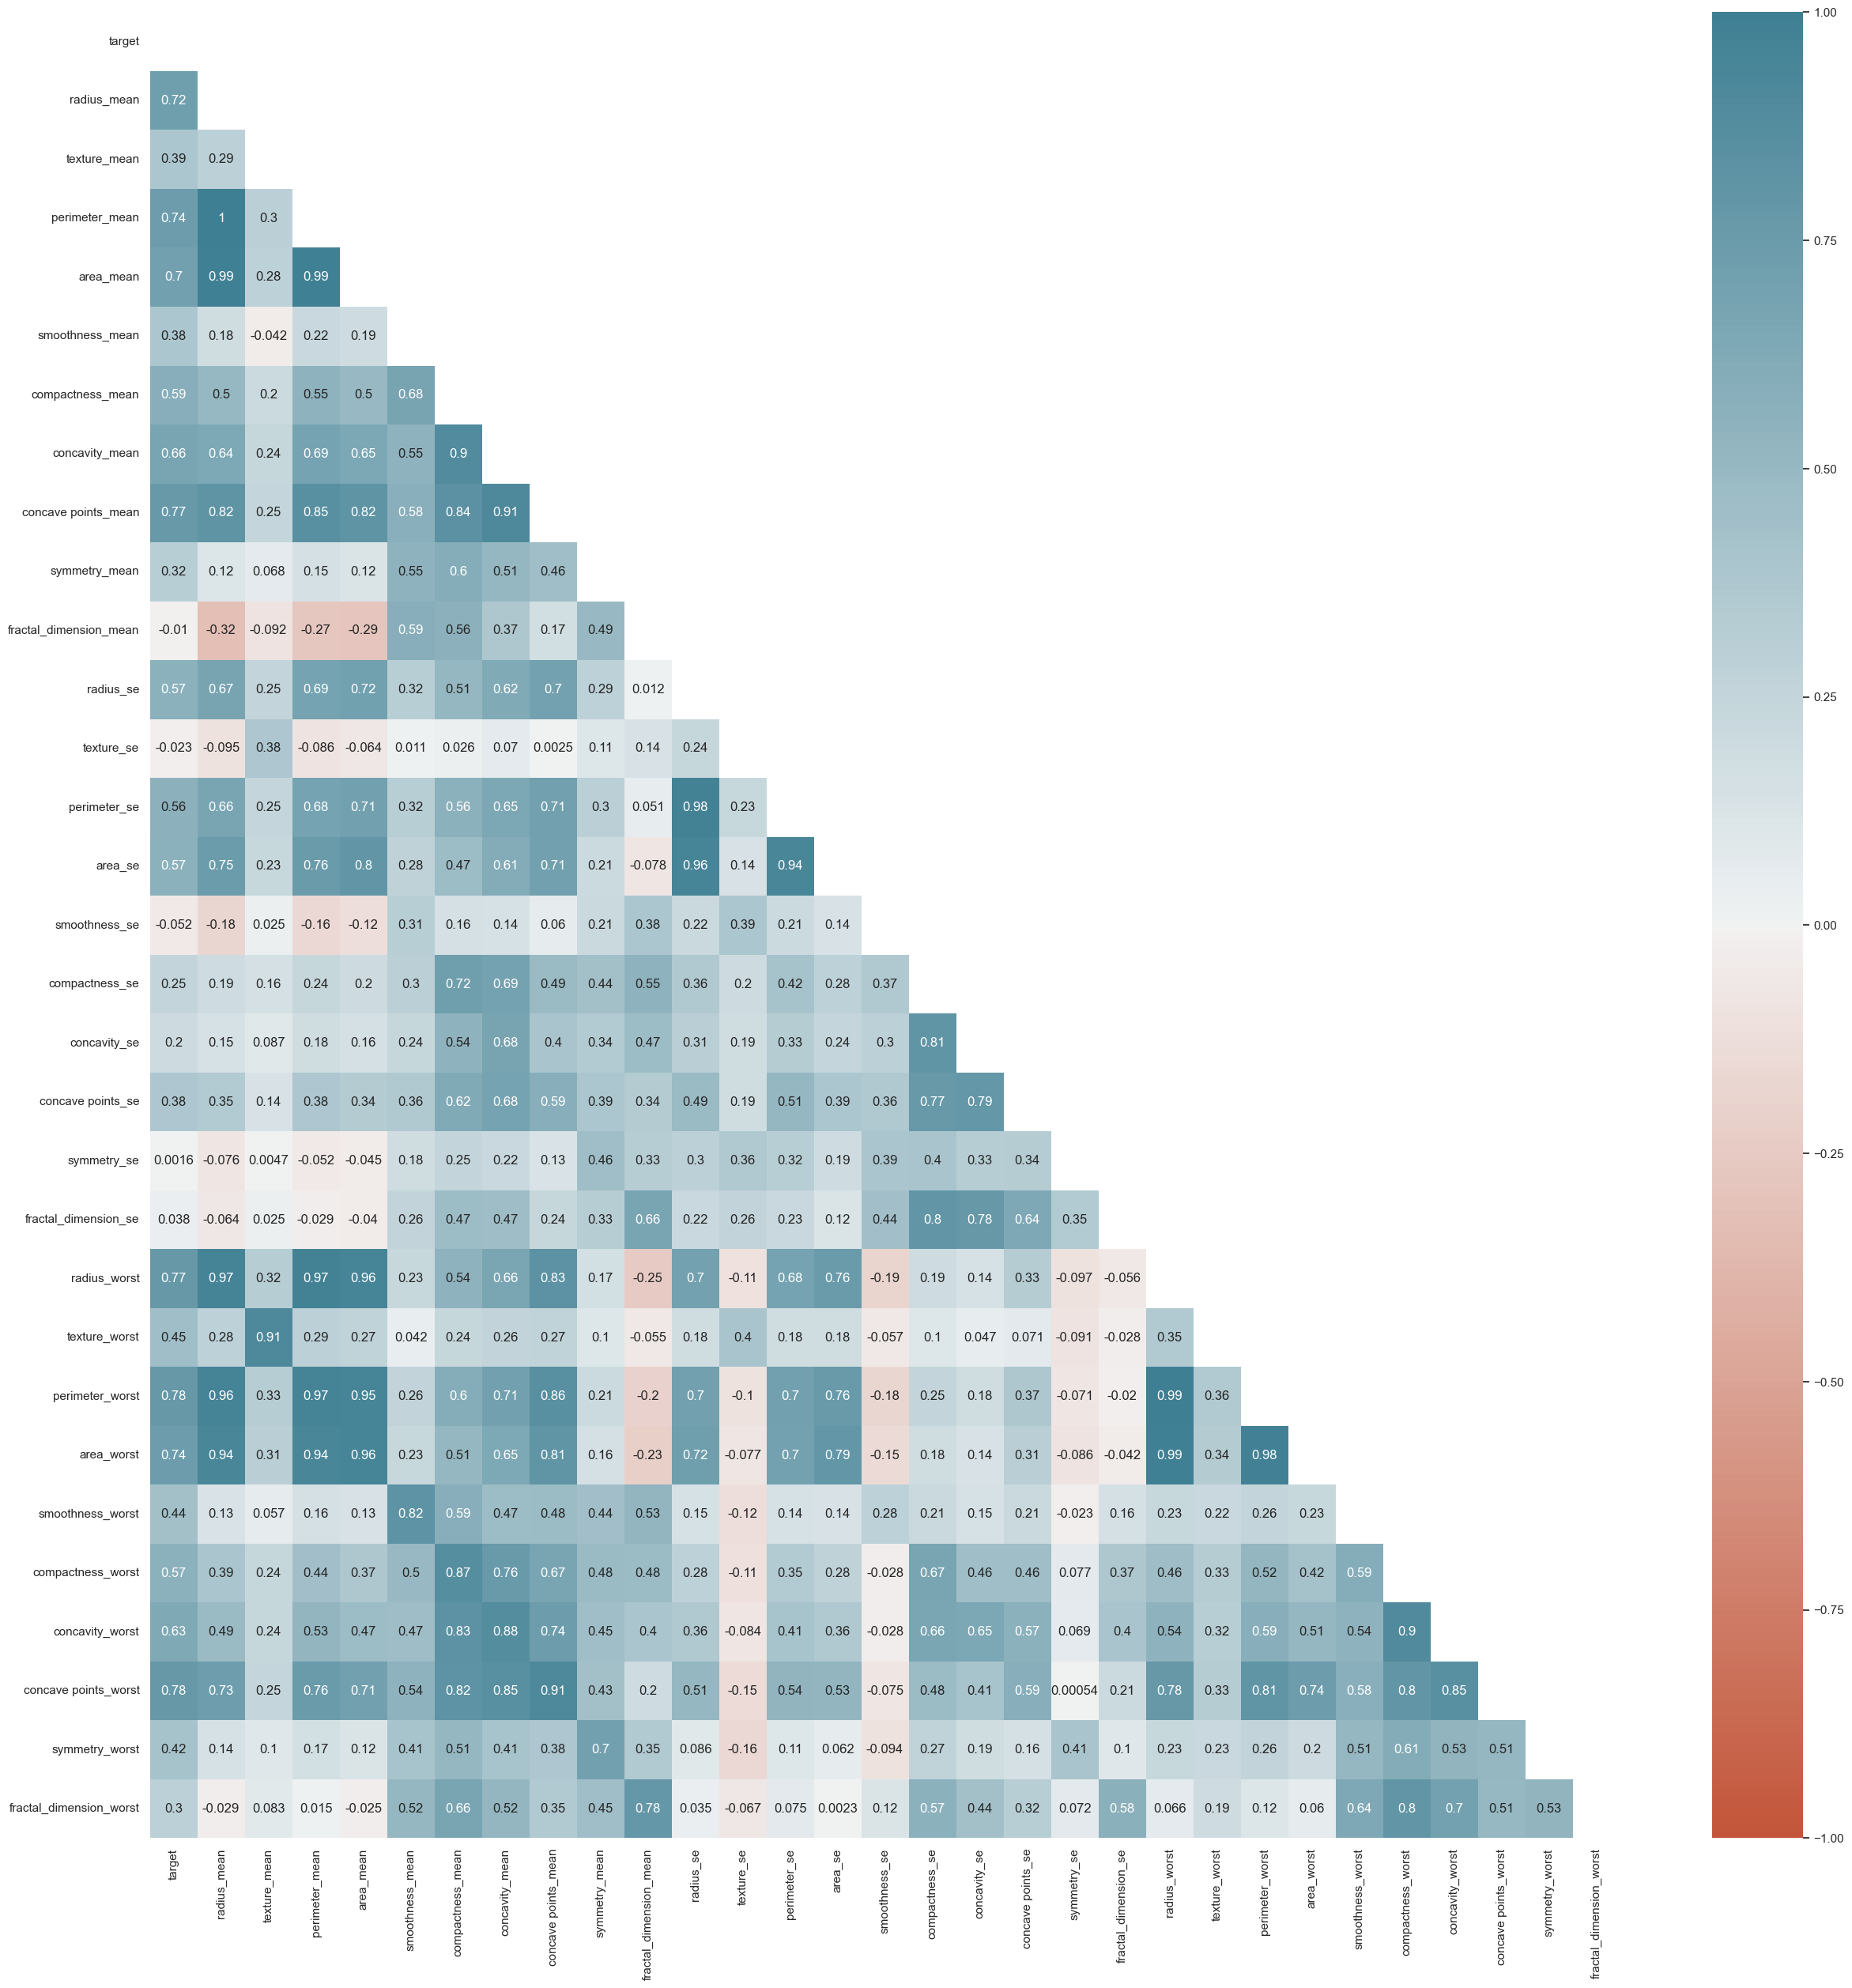

In [59]:
plt.figure(figsize=(30, 30))

matrix = np.triu(data.corr())
sns.heatmap(data.corr(), 
            annot=True, fmt='.2g', 
            mask=matrix, 
            vmin=-1, vmax=1, center=0, 
            cmap=sns.diverging_palette(20, 220, n=256));

In [62]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # Standardize features by removing the mean and scaling to unit variance.
sc.fit(X_train) # Compute the mean and std to be used for later scaling.
X_train_std = sc.transform(X_train) # Perform standardization by centering and scaling.
X_test_std  = sc.transform(X_test) # Perform standardization by centering and scaling.

In [63]:
X_train_std

array([[ 1.70581999,  1.04974466,  2.12129465, ...,  2.04939907,
         3.94428119,  0.86655367],
       [ 0.53638811, -0.90994477,  0.5690952 , ...,  1.25584994,
         0.16797759,  0.40524244],
       [-0.13145612, -0.99333581, -0.14884823, ..., -0.14001353,
         0.74198821,  0.68752098],
       ...,
       [-0.31743806,  1.31844912, -0.38065427, ..., -0.835536  ,
        -0.944168  , -1.15058462],
       [ 0.02071092,  0.25289695,  0.02070601, ...,  0.28913543,
        -0.58853098, -0.2900195 ],
       [ 1.59592158,  1.3161327 ,  1.57659141, ...,  0.88090926,
         0.61408367,  0.04333279]])

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import classification_report

def get_cross_val(clf, X, y, model_name, cv_num=5, metric='f1'):
    scores = cross_val_score(clf, X, y, cv=cv_num, scoring=metric) # cross validation score
    mean = scores.mean() # scores mean value
    std = scores.std() #standard deviation
    p025 = np.quantile(scores, 0.025) # 2.5 percentile
    p975 = np.quantile(scores, 0.975) # 97.5 percentile
    metrics = ['mean', 'standard deviation', 'p025', 'p975'] # metrics
    s = pd.Series([mean, std, p025, p975], index=metrics) # series
    s.name = model_name # series name
    return s

def calculate_metrics(y_true, y_pred, duration, model_name, *args):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    ck = cohen_kappa_score(y_true, y_pred)
    p, r, fbeta, support = precision_recall_fscore_support(y_true, y_pred)
    metrics = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1_score', 'cohen_kappa',  
               'precision_both', 'recall_both', 'fbeta_both', 'support_both', 'time_to_fit (seconds)']
    s = pd.Series([acc, pre, rec, roc_auc, f1, ck, p, r, fbeta, support, duration], index=metrics)
    s.name = model_name
    return s


In [65]:
d_clf = DummyClassifier(strategy='constant', constant=1) 
d_clf.fit(X_train_std, y_train) 

print('Accuracy (train):', d_clf.score(X_train_std, y_train))
print('Accuracy (test):', d_clf.score(X_test_std, y_test))

Accuracy (train): 0.37185929648241206
Accuracy (test): 0.3742690058479532


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       107
           1       0.37      1.00      0.54        64

    accuracy                           0.37       171
   macro avg       0.19      0.50      0.27       171
weighted avg       0.14      0.37      0.20       171



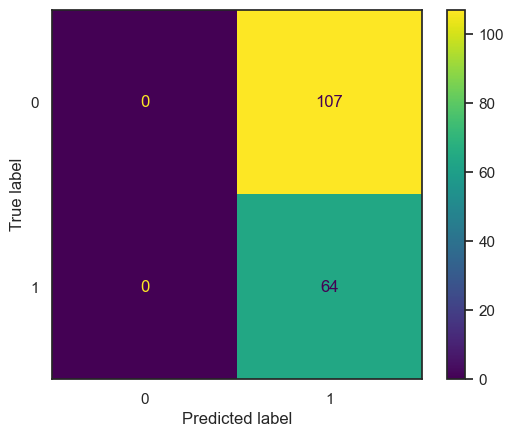

In [69]:
predictions = d_clf.predict(X_test_std) # Predict class labels for samples in X.
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions) # Compute confusion matrix to evaluate the accuracy of a classification.
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=d_clf.classes_) # Confusion Matrix Display.
disp.plot()

In [70]:
y_pred = d_clf.predict(X_test_std)

print(classification_report(y_test, y_pred, target_names = list(np.unique(df['diagnosis']))))

              precision    recall  f1-score   support

      benign       0.00      0.00      0.00       107
   malignant       0.37      1.00      0.54        64

    accuracy                           0.37       171
   macro avg       0.19      0.50      0.27       171
weighted avg       0.14      0.37      0.20       171



### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

lr_clf = LogisticRegressionCV(cv=5, penalty='elsticnet', solver='saga', # Logistic Regression with Elastic-Net regularization. # saga is faster for large datasets.
                              Cs=np.power(10, np.arange(-3, 1, dtype=float)), # Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
                              l1_ratios=np.linspace(0, 1, num=6, dtype=float), # The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty.
                              max_iter= 1000, # Maximum number of iterations of the optimization algorithm.
                              random_state=42)

start = time()
lr_clf.fit(X_train_std, y_train)
lr_duration = time() - start
